In [1]:
%matplotlib inline
import numpy as np
import kwant
import mpld3
from matplotlib import pyplot as plt

In [2]:
def make_system(t=1.0, dis=0.3, E0=complex(0,-0.00029)*0.001, E0L=0., salt='abc', W=200, L=500):
    # Makes a 2d wire with a disordered segment.
    lat = kwant.lattice.square(1)
    sys = kwant.Builder()
    
    #### Define the scattering region. ####
    onsite = lambda site: E0 + dis * (2 * kwant.digest.uniform(repr(site), salt) - 1)
    rectangle = lambda pos: 0 <= pos[0] < L and 0 <= pos[1] < W
    sys[lat.shape(rectangle, (0, 0))] = onsite
    sys[lat.neighbors()] = t


    #### Define and attach the leads. ####
    # Construct the left lead.
    lead = kwant.Builder(kwant.TranslationalSymmetry((-1, 0)))
    lead[(lat(0, j) for j in xrange(W))] = E0L
    lead[lat.neighbors()] = t

    # Attach the left lead and its reversed copy.
    sys.attach_lead(lead)
    sys.attach_lead(lead.reversed())

    return sys

In [ ]:
N = 100
ts = []
rs = []
for n in xrange(N):
    print n
    fsys = make_system(salt = str(n)).finalized()
    s = kwant.smatrix(fsys, energy = 0.38, check_hermiticity=False)
    ts += list(np.linalg.svd(s.submatrix(1,0), compute_uv=False))
    rs += list(np.linalg.svd(s.submatrix(0,0), compute_uv=False))

In [5]:
t_eigs = np.array(ts)**2
r_eigs = np.array(rs)**2

In [10]:
# saved output
np.savez("t_r_coefficients", ts = t_eigs, rs = r_eigs)

In [18]:
# To load saved output:
# a = np.load("t_r_coefficients.npz")
# a.files

Histogram of transmission eigenvalues

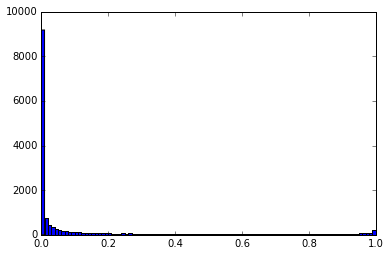

In [6]:
hist_t = plt.hist(t_eigs, bins=100)

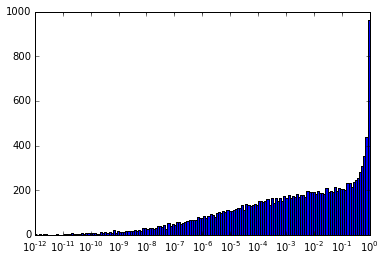

In [7]:
plt.hist(t_eigs, bins=np.logspace(-12., 0., 160))
plt.xscale('log')

Histogram of 1-r

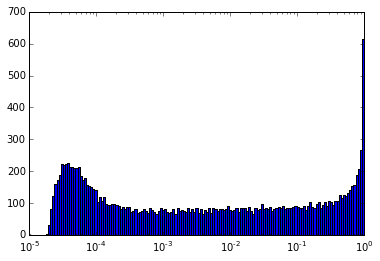

In [8]:
hist_r = plt.hist(1-r_eigs, bins=np.logspace(-5, 0., 160))
plt.xscale('log')

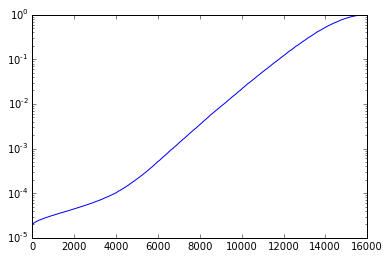

In [9]:
#plt.plot(ts, '.')
plt.plot(1-np.sort(r_eigs)[::-1])
plt.yscale('log')